# Dask on land registry

* load single csv, show doing a groupby (where is the data stored???)
* load parquet 100, show doing groupby, should be quicker?
* load parquet 100, only load selected columns, should be even quicker?

In [1]:
import dask.dataframe as dd
from distributed import Client
import pandas as pd
from IPython import display

from config import *

In [2]:
if 'client' not in dir():
    client = Client(n_workers=8, threads_per_worker=1, processes=True, memory_limit='3GB')
    print(client)
display.HTML(f"<a href={client.dashboard_link}>{client.dashboard_link}</a>")

/home/ian/miniconda3/envs/pydata2020global/lib/python3.8/site-packages/distributed/node.py:151: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 35767 instead
  warnings.warn(


<Client: 'tcp://127.0.0.1:37827' processes=8 threads=8, memory=24.00 GB>


In [3]:
!ls -lta $DATA_PARQUET_100_SNAPPY

total 1532644
drwxr-xr-x 5 ian ian     4096 Oct 24 22:19 ..
drwxr-xr-x 2 ian ian     4096 Oct 21 19:53 .
-rw-r--r-- 1 ian ian   195747 Oct 21 19:53 _metadata
-rw-r--r-- 1 ian ian     6827 Oct 21 19:53 _common_metadata
-rw-r--r-- 1 ian ian 13590795 Oct 21 19:53 part.64.parquet
-rw-r--r-- 1 ian ian 24396714 Oct 21 19:53 part.20.parquet
-rw-r--r-- 1 ian ian 13607029 Oct 21 19:53 part.67.parquet
-rw-r--r-- 1 ian ian 24775093 Oct 21 19:53 part.52.parquet
-rw-r--r-- 1 ian ian 23437867 Oct 21 19:53 part.54.parquet
-rw-r--r-- 1 ian ian 24368008 Oct 21 19:53 part.17.parquet
-rw-r--r-- 1 ian ian 24943062 Oct 21 19:53 part.11.parquet
-rw-r--r-- 1 ian ian 24307902 Oct 21 19:53 part.29.parquet
-rw-r--r-- 1 ian ian 13713246 Oct 21 19:53 part.68.parquet
-rw-r--r-- 1 ian ian 24961533 Oct 21 19:53 part.47.parquet
-rw-r--r-- 1 ian ian 24417892 Oct 21 19:53 part.31.parquet
-rw-r--r-- 1 ian ian 25023231 Oct 21 19:53 part.48.parquet
-rw-r--r-- 1 ian ian 25042840 Oct 21 19:53 part.50.parquet
-rw-r--r-- 1 ia

In [4]:
columns = ['date', 'pt']
ddf = dd.read_parquet(DATA_PARQUET_100_SNAPPY, 
                      columns=columns)
ddf.head()

,date,pt
0,1995-01-31,F
1,1995-10-09,D
2,1995-03-31,D
3,1995-12-04,D
4,1995-09-22,D


In [5]:
%%time
qry = 'date >= "2018-01-01" and date < "2019-12-29"'
ddf_s = ddf.query(qry).set_index('date') # previously unindexed
weekly_completions = ddf_s['pt'].resample('W').count().compute()

CPU times: user 3.53 s, sys: 259 ms, total: 3.79 s
Wall time: 7.32 s


In [ ]:
ddf_s.head()

In [ ]:
weekly_completions.index.name

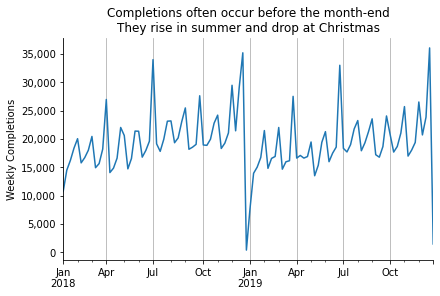

In [7]:
import matplotlib.pyplot as plt
import matplotlib as mpl
fig, ax = plt.subplots(constrained_layout=True)
weekly_completions.plot(ax=ax)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='x')
ax.get_yaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_ylabel('Weekly Completions')
ax.set_title('Completions often occur before the month-end\nThey rise in summer and drop at Christmas');
ax.set_xlabel('');